In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared, Matern

In [2]:
x = "4 mar, 5 mar, 6 mar, 7 mar, 8 mar, 9 mar, 10 mar, 11 mar, 12 mar, 13 mar, 14 mar, 15 mar, 16 mar, 17 mar, 18 mar, 19 mar, 20 mar, 21 mar, 22 mar, 23 mar, 24 mar, 25 mar, 26 mar, 27 mar, 28 mar, 29 mar, 30 mar, 31 mar, 1 kwi, 2 kwi, 3 kwi, 4 kwi, 5 kwi, 6 kwi, 7 kwi, 8 kwi, 9 kwi, 10 kwi, 11 kwi, 12 kwi, 13 kwi, 14 kwi, 15 kwi, 16 kwi, 17 kwi, 18 kwi, 19 kwi, 20 kwi, 21 kwi, 22 kwi, 23 kwi, 24 kwi, 25 kwi, 26 kwi, 27 kwi, 28 kwi, 29 kwi, 30 kwi, 1 maj, 2 maj, 3 maj, 4 maj, 5 maj, 6 maj, 7 maj, 8 maj, 9 maj, 10 maj, 11 maj, 12 maj, 13 maj, 14 maj, 15 maj, 16 maj, 17 maj, 18 maj, 19 maj, 20 maj, 21 maj, 22 maj, 23 maj, 24 maj, 25 maj, 26 maj, 27 maj, 28 maj, 29 maj, 30 maj, 31 maj, 1 cze, 2 cze, 3 cze, 4 cze, 5 cze, 6 cze, 7 cze, 8 cze, 9 cze, 10 cze, 11 cze, 12 cze, 13 cze, 14 cze, 15 cze, 16 cze, 17 cze, 18 cze, 19 cze, 20 cze, 21 cze, 22 cze, 23 cze, 24 cze, 25 cze, 26 cze, 27 cze, 28 cze, 29 cze, 30 cze, 1 lip, 2 lip, 3 lip, 4 lip, 5 lip, 6 lip, 7 lip,8 lip, 9 lip, 10 lip, 11 lip, 12 lip, 13 lip, 14 lip, 15 lip, 16 lip, 17 lip, 18 lip, 19 lip, 20 lip, 21 lip, 22 lip, 23 lip, 24 lip, 25 lip, 26 lip"
y1= "1, 0, 4, 1, 5, 6, 5, 9, 20, 17, 36, 21, 52, 61, 49, 68, 70, 111, 98, 115, 152, 150, 170, 168, 249, 224, 193, 256, 243, 392, 437, 244, 475, 311, 435, 357, 370, 380, 401, 318, 260, 268, 380, 336, 461, 363, 545, 306, 263, 313, 342, 381, 381, 344, 285, 316, 422, 300, 228, 270, 318, 313, 425, 311, 324, 340, 288, 345, 330, 595, 322, 411, 401, 241, 272, 356, 383, 471, 405, 476, 316, 395, 341, 445, 399, 352, 333, 412, 219, 380, 236, 292, 361, 362, 576, 575, 599, 400, 282, 359, 376, 440, 375, 396, 407, 506, 263, 352, 309, 311, 296, 300, 294, 298, 285, 319, 193, 247, 239, 382, 371, 259, 314, 231, 205, 257,277, 262, 265, 305, 370, 299, 267, 264, 333, 353, 339, 358, 279, 399, 380, 418, 458, 584, 443"

x_dates = x.split(",")
y_cases = y1.split(",")
y_cases = [float(el) for el in y_cases]
x_numbers = np.arange(len(y_cases))

In [3]:
len(x_numbers)

145

In [4]:
X = np.atleast_2d(x_numbers).T
y = y_cases
x = np.atleast_2d(np.arange(len(y_cases)+30)).T
#x = np.atleast_2d(np.linspace(0, len(y_cases)+90, 1000)).T

GPML kernel: 20**2 + 316**2 * RBF(length_scale=2)
Log-marginal-likelihood: -6889976.492


/Users/maciejj/anaconda3/envs/corona-vis/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:357: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


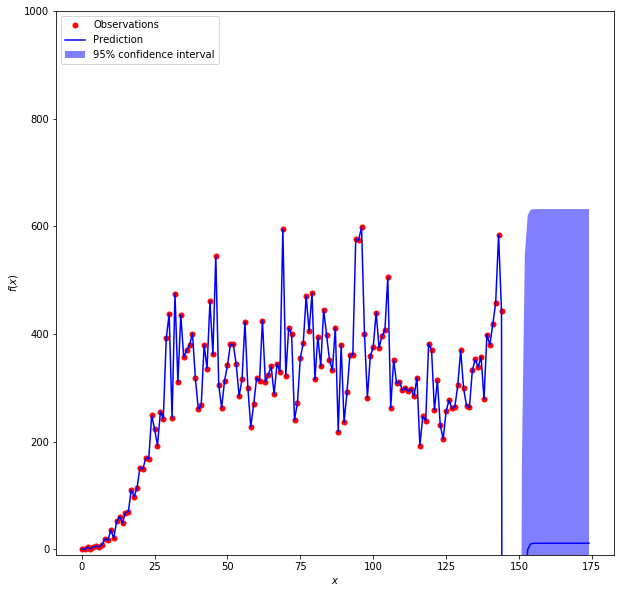

In [6]:
# Instantiate a Gaussian Process model
# Kernel with parameters given in GPML book

k1 = C(constant_value=350, constant_value_bounds=(300, 400.0))
k2=230**2*RBF(length_scale=7, length_scale_bounds=(2, 14.0))
#k3=300*RBF(length_scale=30.0, length_scale_bounds=(0.001, 100000.0))



kernel_gpml = k1+k2
#+k3

#+k2#+k3

gp = GaussianProcessRegressor(kernel=kernel_gpml, n_restarts_optimizer=10)
gp.fit(X, y)

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))



# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)
#print(sigma)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure(figsize=(10,10))
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 1000)
plt.legend(loc='upper left')